In [26]:
# Useful starting lines
%matplotlib inline
import importlib.util
import implementations
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [32]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [3]:
DATA_TEST_PATH = '../data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [33]:
# normalize datas
def normalize (tx):
    tmp=[]
    for column in tx.T:
        min = column.min()
        max = column.max()
        new_col=(column - min)/(max-min)
        tmp.append(new_col)
    return np.array(tmp).T

tX_test = normalize(tX_test)
tX = normalize(tX)
y[y==-1]=0  


0.657332


In [30]:
# boson proportion in train datas
prop=len(y[y==0])/len(y)
print(prop)
# the proportion being close to 0.5, we can say that F1-score will not be as important as if we had a very little proportion of bosons

0.657332


In [5]:
#apply method
def get_w_loss(y,x,method,initial_w=0,max_iters=10,gamma=0.00000005,threshold=1e-08,logs=False,batch_size=1,lambda_=0.005, store=False):
    """applies the algorithm described by <method>. by default as the awaited behaviour for the project, but offers some possible enhancements (batch_size,threshold, logs, store)
    Args:
        y (numpy.ndarray): An array with shape (n,1)
        tx (numpy.ndarray): An array with shape (n,m)
        method (int): 1 -> least_squares_GD*                
                      2 -> stochastic_gradient_descent*
                      3 -> least_squares
                      4 -> ridge_regression
                      5 -> logistic_regression_gradient_descent*
                      6 -> reg_logistic_regression*
        * this algorithm is an iterative descent
        initial_w (Union[float, numpy.ndarray], optional): if a int is set w will start with an array. Defaults to 0.
        max_iters (int, optional): number of iterations (only for descent algorithms). Defaults to 10.
        gamma (float, optional): descent scale factor (only for descent algorithms). Defaults to 0.00000005.
        threshold (float, optional): threshold to prevent divergence in case of linear separability (I assume). Defaults to 1e-08.
        log (bool, optional): if True step by step logs are displayed (only for descent algorithms). Defaults to False.
        batch_size (int, optional): size of the sample on which to compute the partial gradient for stochastic gradient descent algorithm. Defaults to 1.
        lambda_ (float, optional): regularization factor with good values allows to limit overfitting and underfitting (only for ridge_regression and reg_logistic_regression). Defaults to 0.005.
        store (bool, optional): [description]. Defaults to False.
    Returns:
        w (numpy.ndarray): ndarray with shape (n_iters,m) if store and if the method is a descent, else shape(m,1) 
        loss (Union[numpy.ndarray, float]): ndarray with shape (n_iters,) if store and if the method is a descent, else float
    :raises ValueError: if method is not <6
    """
    if(method==1):
        return implementations.least_squares_GD(y,x, initial_w, max_iters, gamma, logs,store)
    elif(method==2): 
        return implementations.stochastic_gradient_descent(y,x, initial_w, max_iters, gamma, batch_size, logs,store)
    elif(method==3):
        return implementations.least_squares(y,x)
    elif(method==4):
        return implementations.ridge_regression(y,x, lambda_=lambda_)
    elif(method==5):
        return implementations.logistic_regression_gradient_descent(y,x,initial_w,max_iters,gamma,threshold,logs,store)
    elif(method==6):
        return implementations.reg_logistic_regression(y,x,initial_w,max_iters,gamma,threshold,logs,store,lambda_)
    else:
        return ValueError


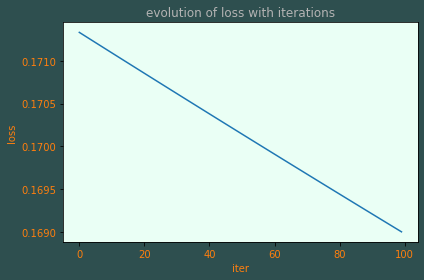

In [9]:
w,losses=get_w_loss(y,tX,1,0,100,5e-05,store=True)
fig, ax = plt.subplots(facecolor=(.18, .31, .31))
plt.plot(losses)
ax.set_facecolor('#eafff5')
ax.set_title('evolution of loss with iterations', color='0.7')
ax.set_ylabel("loss", color='tab:orange')
ax.set_xlabel("iter",color='tab:orange')
ax.tick_params(labelcolor='tab:orange')
plt.tight_layout()

In [35]:
weights,losses = get_w_loss(y,tX,2)
weights_gamma_small,losses_gamma_small = implementations.least_squares_GD(y,tX,2,max_iters=100,gamma=0.005,store=True)

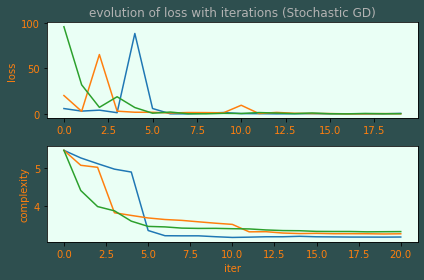

In [17]:
# stochastic gradient descent gmma influence.
fig, axs = plt.subplots(2,1,facecolor=(.18, .31, .31))
for i in range(1,4):
    gamma=5/(i*50)
    weights, losses = get_w_loss(y,tX,2,1,max_iters=20,gamma=gamma,store=True)
    axs[0].plot(losses)
    axs[1].plot([np.linalg.norm(item) for item in weights])
axs[0].set_facecolor('#eafff5')
axs[1].set_facecolor('#eafff5')
axs[0].set_title('evolution of loss with iterations (Stochastic GD)', color='0.7')
axs[0].set_ylabel("loss", color='tab:orange')
axs[1].set_ylabel("complexity", color='tab:orange')
axs[1].set_xlabel("iter",color='tab:orange')
axs[0].tick_params(labelcolor='tab:orange')
axs[1].tick_params(labelcolor='tab:orange')
plt.savefig("loss_complexity_vs_iter_sGD.png")
plt.tight_layout()



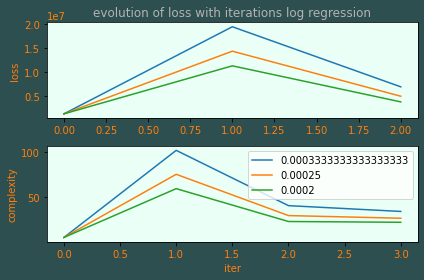

In [20]:
fig, axs = plt.subplots(2,1,facecolor=(.18, .31, .31))
gammas=[]
for i in range(1,4):
    gamma=5/(100**i+10000)
    gammas.append(gamma)
    weights, losses = get_w_loss(y,tX,5,1,max_iters=3,gamma=gamma,store=True)
    axs[0].plot(losses)
    axs[1].plot([np.linalg.norm(item) for item in weights])
plt.legend(gammas)
axs[0].set_facecolor('#eafff5')
axs[1].set_facecolor('#eafff5')
axs[0].set_title('evolution of loss with iterations log regression', color='0.7')
axs[0].set_ylabel("loss", color='tab:orange')
axs[1].set_ylabel("complexity", color='tab:orange')
axs[1].set_xlabel("iter",color='tab:orange')
axs[0].tick_params(labelcolor='tab:orange')
axs[1].tick_params(labelcolor='tab:orange')
plt.savefig("loss complexity vs iter log gamma varriing.png")
plt.tight_layout()


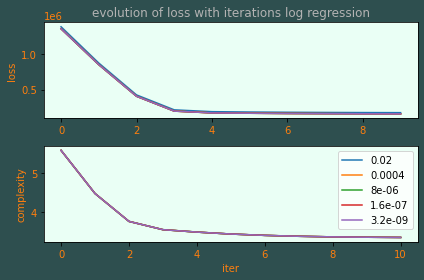

In [38]:
fig, axs = plt.subplots(2,1,facecolor=(.18, .31, .31))
lambdas_=[]
for i in range(1,6):
    lambda_=1/i**5
    lambdas_.append(lambda_)
    weights, losses = get_w_loss(y,tX,6,1,max_iters=10,gamma=0.000005,lambda_=lambda_,store=True)
    axs[0].plot(losses)
    axs[1].plot([np.linalg.norm(item) for item in weights])
plt.legend(lambdas_)
axs[0].set_facecolor('#eafff5')
axs[1].set_facecolor('#eafff5')
axs[0].set_title('evolution of loss with iterations log regression', color='0.7')
axs[0].set_ylabel("loss", color='tab:orange')
axs[1].set_ylabel("complexity", color='tab:orange')
axs[1].set_xlabel("iter",color='tab:orange')
axs[0].tick_params(labelcolor='tab:orange')
axs[1].tick_params(labelcolor='tab:orange')
plt.savefig("loss complexity vs iters reg log lambda variations.png")
plt.tight_layout()


In [37]:
print(losses)

[1355541.4477042907, 850224.170706406, 405177.5034157667, 196232.72669323877, 170934.3594661295, 166062.16441537268, 162731.83979217772, 160444.07493942312, 158839.4085028409, 157676.00088469824]


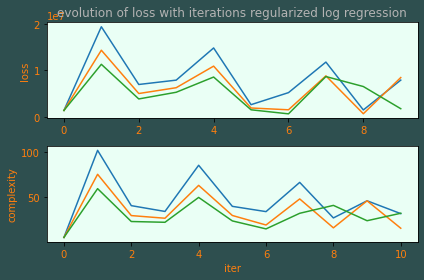

In [15]:
fig, axs = plt.subplots(2,1,facecolor=(.18, .31, .31))

for i in range(1,4):
    gamma=5/(i*5000+10000)
    weights, losses = get_w_loss(y,tX,6,1,max_iters=10,gamma=gamma,store=True)
    axs[0].plot(losses)
    axs[1].plot([np.linalg.norm(item) for item in weights])
axs[0].set_facecolor('#eafff5')
axs[1].set_facecolor('#eafff5')
axs[0].set_title('evolution of loss with iterations regularized log regression', color='0.7')
axs[0].set_ylabel("loss", color='tab:orange')
axs[1].set_ylabel("complexity", color='tab:orange')
axs[1].set_xlabel("iter",color='tab:orange')
axs[0].tick_params(labelcolor='tab:orange')
axs[1].tick_params(labelcolor='tab:orange')
plt.savefig("loss complexity vs iter reg log.png")
plt.tight_layout()


In [80]:
OUTPUT_PATH = '../data/submission.csv'

#for i in range(-10,10,1):
#    ml,weights=get_w(y,tX,2,i,max_iters=1000,log=False)
#    mls.append(ml)
#    weightss.append(weights)
#print(np.where(mls==min(mls)))
#print(mls)
method=6
weights, loss=get_w_loss(y,tX,method,logs=False,max_iters=100, gamma=0.00000005)
print(str(weights) + str(loss))
#weights=weightss[np.where(mls==min(mls))[0][0]]

if(method==5 or method==6 ):
    data = np.c_[np.ones((_.shape[0], 1)), tX_test]
else:
    data=tX_test
y_pred = predict_labels(weights, data)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

[-1.29403870e-01 -2.91730995e-02 -2.00207353e-02 -7.43987553e-03
  2.61200030e-05  2.96128267e-03  4.45894474e-03  2.63959264e-03
 -5.03080879e-02 -9.20242310e-04 -1.89036279e-03 -1.40595144e-02
  1.11295115e-02  2.89695886e-03  9.93541798e-04 -6.35308664e-02
 -6.45185187e-02 -5.71741926e-03 -6.28745791e-02 -6.41306668e-02
 -1.71977192e-03 -6.22424195e-02 -7.33113073e-03 -1.40323921e-02
 -1.41680560e-02 -2.98315112e-02 -2.98759455e-02  1.69084100e-03
  2.86435526e-03  2.86468641e-03 -6.81434900e-04]163801.4252998072
